In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('fin_dat.csv')
df

,valid,relh,drct,sknt,alti,vsby,temp_c,dewpoint_c,feel_c
0,2010-01-01 00:00:00,72.20,170.0,3.0,30.09,3.73,16.0,11.0,16.0
1,2010-01-01 00:30:00,72.20,170.0,3.0,30.09,1.86,16.0,11.0,16.0
2,2010-01-01 01:00:00,72.20,150.0,4.0,30.09,1.24,16.0,11.0,16.0
3,2010-01-01 01:30:00,72.20,150.0,4.0,30.09,1.24,16.0,11.0,16.0
4,2010-01-01 02:00:00,76.98,150.0,8.0,30.09,1.24,15.0,11.0,15.0
...,...,...,...,...,...,...,...,...,...
260713,2024-10-21 21:30:00,56.63,50.0,8.0,30.09,6.21,22.0,13.0,22.0
260714,2024-10-21 22:00:00,56.63,40.0,10.0,30.09,6.21,22.0,13.0,22.0
260715,2024-10-21 22:30:00,56.63,40.0,7.0,30.12,6.21,21.0,13.0,22.0
260716,2024-10-21 23:00:00,60.21,30.0,7.0,30.09,6.21,21.0,13.0,21.0


In [ ]:
df['valid'] = pd.to_datetime(df['valid'])
df

,valid,relh,drct,sknt,alti,vsby,temp_c,dewpoint_c,feel_c
0,2010-01-01 00:00:00,72.20,170.0,3.0,30.09,3.73,16.0,11.0,16.0
1,2010-01-01 00:30:00,72.20,170.0,3.0,30.09,1.86,16.0,11.0,16.0
2,2010-01-01 01:00:00,72.20,150.0,4.0,30.09,1.24,16.0,11.0,16.0
3,2010-01-01 01:30:00,72.20,150.0,4.0,30.09,1.24,16.0,11.0,16.0
4,2010-01-01 02:00:00,76.98,150.0,8.0,30.09,1.24,15.0,11.0,15.0
...,...,...,...,...,...,...,...,...,...
260713,2024-10-21 21:30:00,56.63,50.0,8.0,30.09,6.21,22.0,13.0,22.0
260714,2024-10-21 22:00:00,56.63,40.0,10.0,30.09,6.21,22.0,13.0,22.0
260715,2024-10-21 22:30:00,56.63,40.0,7.0,30.12,6.21,21.0,13.0,22.0
260716,2024-10-21 23:00:00,60.21,30.0,7.0,30.09,6.21,21.0,13.0,21.0


In [ ]:
specific_times = ["00:00:00", "06:00:00", "12:00:00", "18:00:00"]
df = df[df["valid"].dt.strftime("%H:%M:%S").isin(specific_times)]
df = df.reset_index(drop=True)
df

,valid,relh,drct,sknt,alti,vsby,temp_c,dewpoint_c,feel_c
0,2010-01-01 00:00:00,72.20,170.0,3.0,30.09,3.73,16.0,11.0,16.000000
1,2010-01-01 06:00:00,72.20,230.0,3.0,30.09,1.86,16.0,11.0,16.000000
2,2010-01-01 12:00:00,43.97,240.0,7.0,30.09,3.73,24.0,11.0,24.000000
3,2010-01-01 18:00:00,56.13,180.0,5.0,30.09,6.21,20.0,11.0,20.000000
4,2010-01-02 00:00:00,59.50,180.0,8.0,30.06,1.24,18.0,10.0,18.000000
...,...,...,...,...,...,...,...,...,...
22178,2024-10-20 18:00:00,57.12,40.0,13.0,30.09,6.21,24.0,15.0,24.000000
22179,2024-10-21 00:00:00,64.48,20.0,7.0,30.09,6.21,22.0,15.0,22.000000
22180,2024-10-21 06:00:00,68.75,50.0,6.0,30.12,6.21,22.0,16.0,22.000000
22181,2024-10-21 12:00:00,37.07,20.0,14.0,30.06,6.21,28.0,12.0,27.477778


In [ ]:
df.set_index('valid', inplace=True)

In [ ]:
data = df.values

In [ ]:
features = ['relh', 'drct', 'sknt', 'alti', 'vsby', 'dewpoint_c', 'feel_c']
target = 'temp_c'

In [ ]:
features_columns = [df.columns.get_loc(f) for f in features]
target_column = df.columns.get_loc(target)

num_steps_per_day = 4
sequence_length = 7 * num_steps_per_day
prediction_horizon = 3 * num_steps_per_day

X = []
y = []
data = df.values
total_days = len(data) // num_steps_per_day

for day in range(total_days - 9):
    start_idx = day * num_steps_per_day
    end_idx = start_idx + sequence_length
    next_day_idx = end_idx
    output_end_idx = next_day_idx + prediction_horizon

    input_sequence = data[start_idx:end_idx, features_columns]

    output_sequence = data[next_day_idx:output_end_idx, target_column]

    if len(input_sequence) == sequence_length and len(output_sequence) == prediction_horizon:
        X.append(input_sequence)
        y.append(output_sequence)

X = np.array(X)
y = np.array(y)


In [ ]:
X_flat = X.reshape(-1, X.shape[2])
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled_flat = scaler_X.fit_transform(X_flat)
X_scaled = X_scaled_flat.reshape(X.shape)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y)

split_index = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]


In [ ]:
def build_and_train_model(learning_rate, num_layers, num_units, activation, dropout_rate, batch_size):
    model = Sequential()
    model.add(LSTM(num_units, activation=activation, return_sequences=(num_layers > 1), input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    for _ in range(num_layers - 1):
        model.add(LSTM(num_units, activation=activation, return_sequences=False))
        model.add(Dropout(dropout_rate))
    model.add(Dense(y_train.shape[1]))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=batch_size, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_original = scaler_y.inverse_transform(y_pred)
    y_test_original = scaler_y.inverse_transform(y_test)
    mae = mean_absolute_error(y_test_original, y_pred_original)
    return model, history, mae


In [ ]:
configurations = [
    {'learning_rate': 0.001, 'num_layers': 2, 'num_units': 64, 'activation': 'tanh', 'dropout_rate': 0.2, 'batch_size': 32},
]

results = []
for config in configurations:
    model, history, mae = build_and_train_model(**config)
    results.append((config, mae))

best_config = min(results, key=lambda x: x[1])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [ ]:
final_model = Sequential()
final_model.add(LSTM(best_config[0]['num_units'], activation=best_config[0]['activation'],
                     return_sequences=(best_config[0]['num_layers'] > 1),
                     input_shape=(X_train.shape[1], X_train.shape[2])))
final_model.add(Dropout(best_config[0]['dropout_rate']))
for _ in range(best_config[0]['num_layers'] - 1):
    final_model.add(LSTM(best_config[0]['num_units'], activation=best_config[0]['activation'], return_sequences=False))
    final_model.add(Dropout(best_config[0]['dropout_rate']))
final_model.add(Dense(y_train.shape[1]))
optimizer = Adam(learning_rate=best_config[0]['learning_rate'])
final_model.compile(optimizer=optimizer, loss='mse')
history = final_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=best_config[0]['batch_size'], verbose=1)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0664 - val_loss: 0.0123
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0174 - val_loss: 0.0117
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0158 - val_loss: 0.0113
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0147 - val_loss: 0.0113
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0140 - val_loss: 0.0125
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0139 - val_loss: 0.0112
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0133 - val_loss: 0.0111
Epoch 8/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0134 - val_loss: 0.0111
Epoch 9/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0127 - val_loss: 0.0107
Epoch 10/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0129 - val_loss: 0.0109
Epoch 11/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0124 - val_loss: 0.0107
Epoch 12/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
y_pred_scaled = final_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


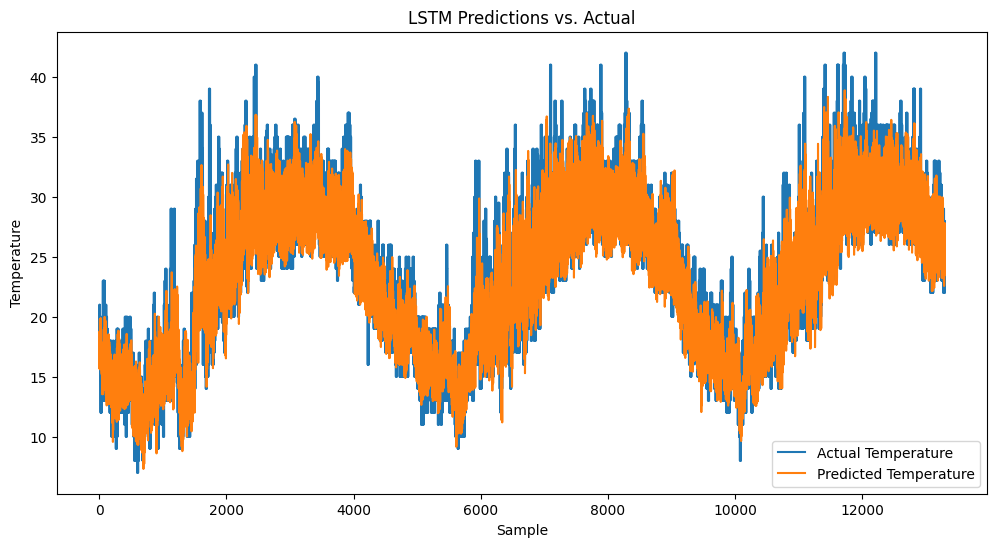

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_original.flatten(), label="Actual Temperature")
plt.plot(y_pred.flatten(), label="Predicted Temperature")
plt.legend()
plt.title("LSTM Predictions vs. Actual")
plt.xlabel("Sample")
plt.ylabel("Temperature")
plt.show()


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_original, y_pred)

print(f"R² (Coefficient of Determination): {r2}")


R² (Coefficient of Determination): 0.7763584106934228
